In [88]:
import math # 수학 모듈
import numpy as np # 넘파이
import pandas as pd # 판다스
import matplotlib.pyplot as plt # 그래프
from datetime import datetime # 시계열
from statsmodels.tsa.api import SimpleExpSmoothing

%matplotlib inline

In [160]:
data_path = "C:/k_digital/source/data/cam_data/Data.csv"
fanuc_path = "C:/k_digital/source/data/cam_data/fanuc.csv"
data_df = pd.read_csv(data_path)
fanuc_df = pd.read_csv(fanuc_path)
data_df.drop(["name", 'Irsm1', 'Irsm2', 'currvolt1', 'currvolt3', 'input1', 'input2', 'input3', 'input4', 'temp1', 'temp2'], axis=1, inplace=True)
fanuc_df.drop(["name", 'TOTAL_COUNTER', 'PART COUNTER', 'GW DRESSING INTERVAL', 'Manual Automatic', 'Automatic Driving'], axis=1, inplace=True)

In [161]:
def trans_timestamp_with_ms(df):
    for i in range(len(df.time)):
        df.time[i] = datetime.fromtimestamp((df.time[i] / 1000000000))
    print(df.head())

In [162]:
trans_timestamp_with_ms(data_df)
trans_timestamp_with_ms(fanuc_df)

C:\Users\minim\AppData\Local\Temp\ipykernel_47824\1091644394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = datetime.fromtimestamp((df.time[i] / 1000000000))


                         time  Irsm3  currvolt2  currvolt4  humidity  \
0  2022-11-04 16:38:53.508363  44.14       4.21       0.33     11.09   
1  2022-11-04 16:38:54.507849  46.91       4.22       0.35     11.12   
2  2022-11-04 16:38:55.507067  45.57       4.21       0.33     11.12   
3  2022-11-04 16:38:56.506512  46.12       4.21       0.33     11.12   
4  2022-11-04 16:38:57.504720  46.72       4.21       0.33     11.12   

   temperature  
0        35.59  
1        35.59  
2        35.57  
3        35.57  
4        35.57  


C:\Users\minim\AppData\Local\Temp\ipykernel_47824\1091644394.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.time[i] = datetime.fromtimestamp((df.time[i] / 1000000000))


                         time  GW WHEEL REMAIN  Macual Automatic Mode  \
0  2022-11-04 16:39:48.228899          39.6198                      0   
1  2022-11-04 16:39:49.226802          39.6198                      0   
2  2022-11-04 16:39:50.247180          39.6198                      0   
3  2022-11-04 16:39:51.268892          39.6198                      0   
4  2022-11-04 16:39:52.288630          39.6198                      0   

   RW DRESSING INTERVAL  RW WHEEL REMAIN  Status of automatic operation  \
0                   630          10.1468                              0   
1                   630          10.1468                              0   
2                   630          10.1468                              0   
3                   630          10.1468                              0   
4                   630          10.1468                              0   

   Status of axis movement  
0                        0  
1                        0  
2                      

In [14]:
data_df.to_csv("Data.csv", index=False)
fanuc_df.to_csv("fanuc.csv", index=False)

In [100]:
data_df = pd.read_csv("Data.csv", parse_dates=["time"], index_col="time")
fanuc_df = pd.read_csv("fanuc.csv", parse_dates=["time"], index_col="time")

In [163]:
data_df.head()

,time,Irsm3,currvolt2,currvolt4,humidity,temperature
0,2022-11-04 16:38:53.508363,44.14,4.21,0.33,11.09,35.59
1,2022-11-04 16:38:54.507849,46.91,4.22,0.35,11.12,35.59
2,2022-11-04 16:38:55.507067,45.57,4.21,0.33,11.12,35.57
3,2022-11-04 16:38:56.506512,46.12,4.21,0.33,11.12,35.57
4,2022-11-04 16:38:57.504720,46.72,4.21,0.33,11.12,35.57


In [165]:
n = data_df.shape[0]
n1 = 163674
n = n - n1
n

275084

In [175]:
data_df_train = data_df[n1 + 1: int(n1 + n * 0.75) + 1]
data_df_test = data_df[int(n1 + n * 0.75) : -1]

In [176]:
data_df.head()

,time,Irsm3,currvolt2,currvolt4,humidity,temperature
0,2022-11-04 16:38:53.508363,44.14,4.21,0.33,11.09,35.59
1,2022-11-04 16:38:54.507849,46.91,4.22,0.35,11.12,35.59
2,2022-11-04 16:38:55.507067,45.57,4.21,0.33,11.12,35.57
3,2022-11-04 16:38:56.506512,46.12,4.21,0.33,11.12,35.57
4,2022-11-04 16:38:57.504720,46.72,4.21,0.33,11.12,35.57


In [177]:
data_df_train.set_index('time', inplace=True)
data_df_test.set_index('time', inplace=True)

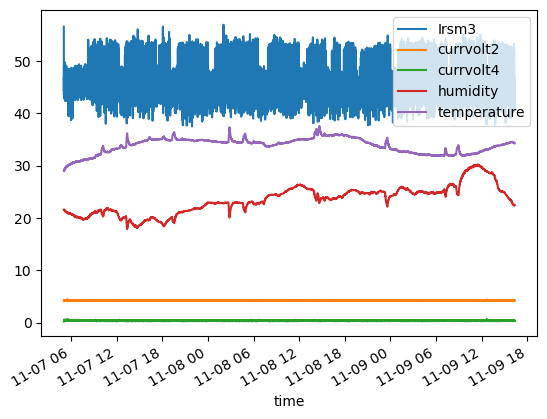

In [178]:
ax = data_df_train.plot()

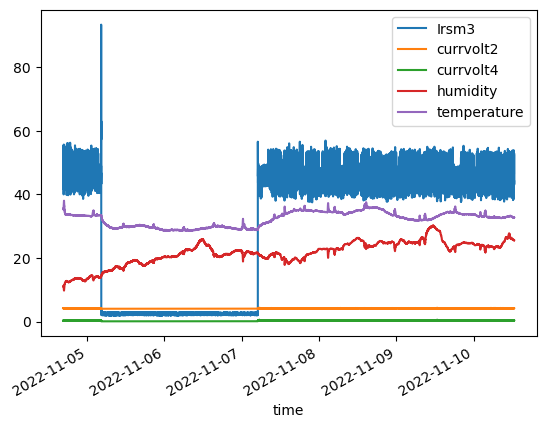

In [183]:
ax = data_df.set_index('time').plot()

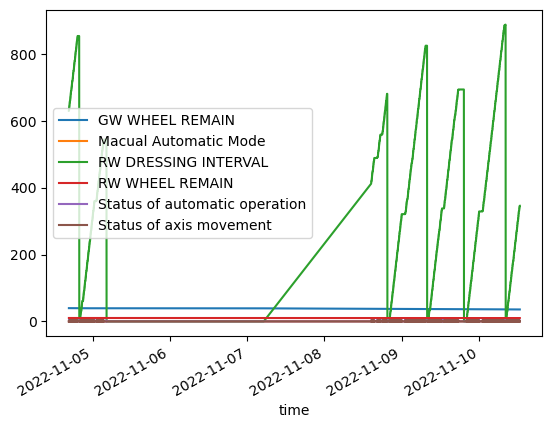

In [103]:
ax = fanuc_df.plot()

<AxesSubplot:>

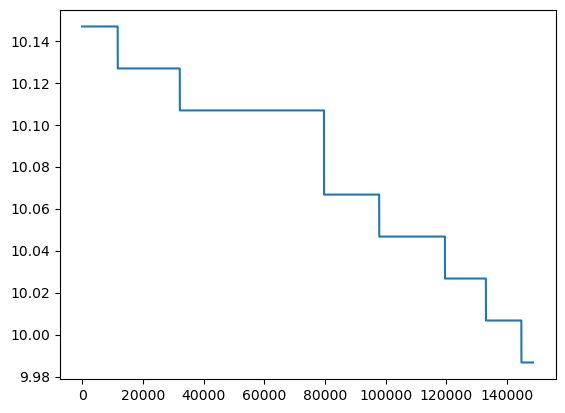

In [123]:
fanuc_df['RW WHEEL REMAIN'].plot()

<AxesSubplot:>

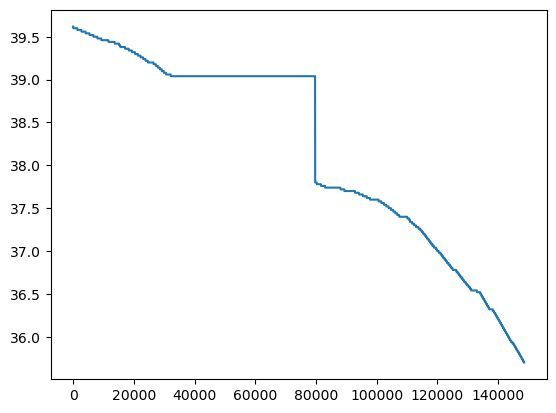

In [124]:
fanuc_df['GW WHEEL REMAIN'].plot()